In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [12]:
data = pd.read_csv('training_mush.csv')
X_train = data.drop(columns='class')
y_train = data['class']

In [22]:
clf_rf = RandomForestClassifier(random_state=0)
search_rf = GridSearchCV(clf_rf,\
    param_grid={"n_estimators": range(10, 60, 10), 'max_depth' : range(1, 13, 2),\
        "min_samples_leaf": range(1, 8), 'min_samples_split': [2, 4, 6, 8, 9]}, cv=3, n_jobs=-1, verbose=1)
search_rf.fit(X_train,y_train)
search_rf.best_estimator_

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits


RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

Параметры для выбора -
"n_estimators": range(10, 60, 10)
'max_depth' : range(1, 13, 2)
"min_samples_leaf": range(1, 8)
'min_samples_split': [2, 4, 6, 8, 9]

<AxesSubplot:>

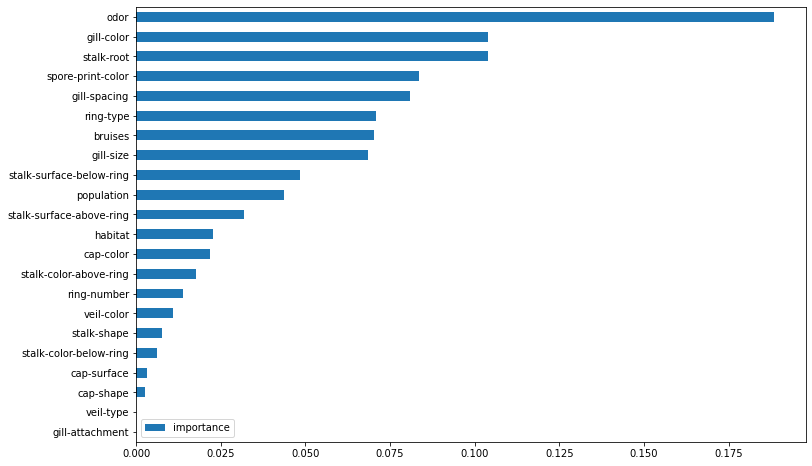

In [43]:
rf = search_rf.best_estimator_
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [54]:
X_test = pd.read_csv('testing_mush.csv')
y_pred = list(rf.predict(X_test))

In [55]:
y_true = pd.read_csv('testing_y_mush.csv')
y_true.value_counts()
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]])

<AxesSubplot:>

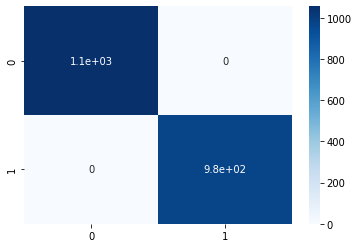

In [58]:
from seaborn import heatmap
heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")